<h6>
Steps
0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model
</h6>

In [526]:
import numpy as np
import pandas as pd

In [527]:
df = pd.read_csv('./placement.csv')

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [529]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [530]:
df.shape

(100, 4)

In [531]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [532]:
import matplotlib.pyplot as plt

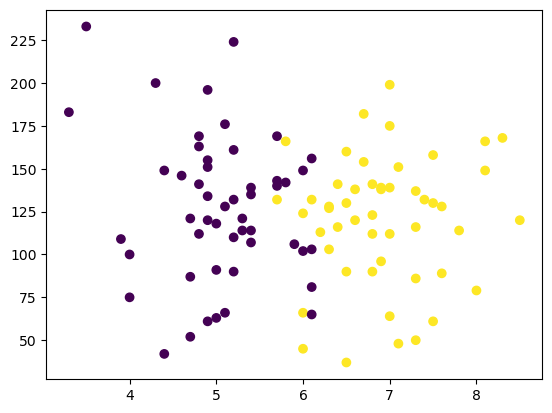

In [533]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

<h6>x = independent veriable,
y = dependent veriable</h6>

In [534]:
x = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [535]:
x.head(2)

,cgpa,iq
0,6.8,123.0
1,5.9,106.0


In [536]:
y.shape

(100,)

In [537]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_test.head(2)

,cgpa,iq
42,7.6,89.0
26,7.0,199.0


<h6>10% data for xtest and ytest </h6>

In [538]:
x_test.shape

(10, 2)

In [539]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [540]:
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.19317112,  0.50924269],
       [ 0.96585559, -0.27312907],
       [-0.90641832,  0.28210251],
       [-1.70882142, -0.57598265],
       [-1.44135372,  1.94779722],
       [-0.90641832,  0.71114508],
       [ 0.16345248, -0.50026925],
       [-0.72810652, -1.4340678 ],
       [-0.81726242, -1.5097812 ],
       [-0.01485932, -0.42455586],
       [ 0.34176428,  0.10543791],
       [-0.63895062, -0.32360466],
       [-0.63895062,  2.55350439],
       [ 0.78754379,  0.4587671 ],
       [-1.79797732, -0.34884246],
       [ 1.41163509, -1.5602568 ],
       [-1.17388602,  0.58495609],
       [-0.81726242, -0.12170227],
       [ 0.07429658, -1.96406158],
       [ 0.52007609, -2.16596397],
       [ 0.34176428, -0.50026925],
       [-0.72810652,  0.13067571],
       [-0.99557422,  0.4587671 ],
       [ 0.16345248, -1.4593056 ],
       [-0.81726242, -0.80312284],
       [-0.72810652,  1.34209005],
       [ 0.07429658, -1.4340678 ],
       [ 0.16345248,  0.23162691],
       [ 0.78754379,

In [541]:
x_test = scaler.transform(x_test)
x_test 

array([[ 1.50079099, -0.85359844],
       [ 0.96585559,  1.92255942],
       [-0.46063882,  0.3073403 ],
       [ 0.60923199, -0.07122668],
       [ 1.41163509,  0.18115131],
       [ 0.87669969,  0.3830537 ],
       [ 2.12488229,  1.14018766],
       [-0.99557422,  1.01399867],
       [ 1.05501149, -1.88834818],
       [-0.46063882, -0.22265347]])

In [542]:
from sklearn.linear_model import LogisticRegression

In [543]:
# model training
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [544]:
y_pred = clf.predict(x_test)

In [545]:
print(f"test value:\n{y_test}");
print(f"prediction value:\n{y_pred}");

test value:
42    1
26    1
49    0
20    1
83    1
11    1
53    1
34    0
5     1
41    0
Name: placement, dtype: int64
prediction value:
[1 1 0 1 1 1 1 0 1 0]


In [546]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# 1.0 means 100% accuracy

1.0

<Axes: >

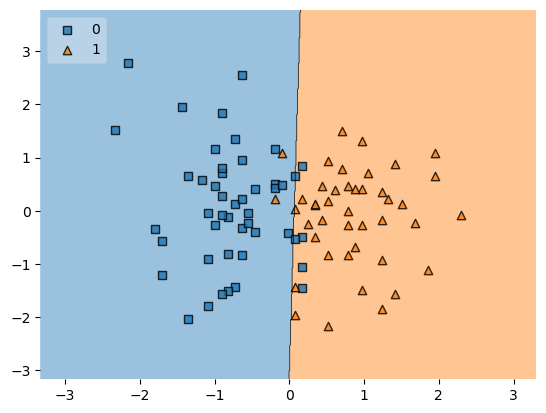

In [547]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [548]:
import pickle

In [549]:
pickle.dump(clf, open('model.pkl', 'wb'))